# Chapter 5: Categorizing and Tagging Words

Notes from NLTK Book http://www.nltk.org/book/

*The goal of this chapter is to answer the following questions:*
* *What are lexical categories and how are they used in natural language processing?*
* *What is a good Python data structure for storing words and their categories?*
* *How can we automatically tag each word of a text with its word class?*

## Using a Tagger

**part-of-speech (POS) tagger**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import nltk
from nltk import word_tokenize

In [2]:
text = word_tokenize("And now for something completely different")
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

In [3]:
text = word_tokenize("They refuse to permit us to obtain the refuse permit")
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

* CC: coordinating conjunction
* RB: adverb
* IN: preposition
* NN: noun
* JJ: adjective
* VBP: present tense verb

*more details below*

In [5]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

**`text.similar(w)`** finds words that appear in similar contexts to **w**

**from book:** *The text.similar() method takes a word w, finds all contexts w1w w2, then finds all words w' that appear in the same context, i.e. w1w'w2*

**words similar to 'woman' -- mostly nouns**

In [6]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())
text.similar('woman')

man time day year car moment world house family country child boy
state job way place war girl work week


**words similar to 'bought' -- mostly verbs**

In [7]:
text.similar('bought')

made done said put had found seen left given heard been set was
brought got called in that felt told


**words similar to 'over' -- mostly prepositions**

In [8]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [9]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


## Tagged Corpora

### Representing Tagged Tokens

*typically represented as a tuple:* `(token, tag)`

Can be generated using `str2tuple`...

In [10]:
tagged_token = nltk.tag.str2tuple('fly/NN')
tagged_token

('fly', 'NN')

In [11]:
sent = '''
The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
interest/NN of/IN both/ABX governments/NNS ''/'' ./.
'''
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

### Reading Tagged Corpora

    The/at Fulton/np-tl County/nn-tl Grand/jj-tl Jury/nn-tl said/vbd Friday/nr an/at investigation/nn of/in Atlanta's/np$ recent/jj primary/nn election/nn produced/vbd / no/at evidence/nn ''/'' that/cs any/dti irregularities/nns took/vbd place/nn ./.

if a corpus contains tagged text, the corpus interface will have a **`tagged_words()`** method

In [12]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [13]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [14]:
print(nltk.corpus.nps_chat.tagged_words())

[('now', 'RB'), ('im', 'PRP'), ('left', 'VBD'), ...]


In [15]:
nltk.corpus.conll2000.tagged_words()

[('Confidence', 'NN'), ('in', 'IN'), ('the', 'DT'), ...]

In [16]:
nltk.corpus.treebank.tagged_words()

[('Pierre', 'NNP'), ('Vinken', 'NNP'), (',', ','), ...]

*not all corpora have the same tag sets, so can force mapping to **universal** tagset*

In [17]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [18]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

Tagged corpora in other languages...

In [19]:
nltk.corpus.sinica_treebank.tagged_words()

[('一', 'Neu'), ('友情', 'Nad'), ('嘉珍', 'Nba'), ...]

In [20]:
nltk.corpus.indian.tagged_words()

[('মহিষের', 'NN'), ('সন্তান', 'NN'), (':', 'SYM'), ...]

In [21]:
nltk.corpus.mac_morpho.tagged_words()

[('Jersei', 'N'), ('atinge', 'V'), ('média', 'N'), ...]

In [23]:
nltk.corpus.conll2002.tagged_words()

[('Sao', 'NC'), ('Paulo', 'VMI'), ('(', 'Fpa'), ...]

In [24]:
nltk.corpus.cess_cat.tagged_words()

[('El', 'da0ms0'), ('Tribunal_Suprem', 'np0000o'), ...]

### A Universal Part-of-Speech tagset

**Common POS tags**

In [25]:
brn = nltk.corpus.brown
brown_news_tagged = brn.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common()

[('NOUN', 30640),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 106)]

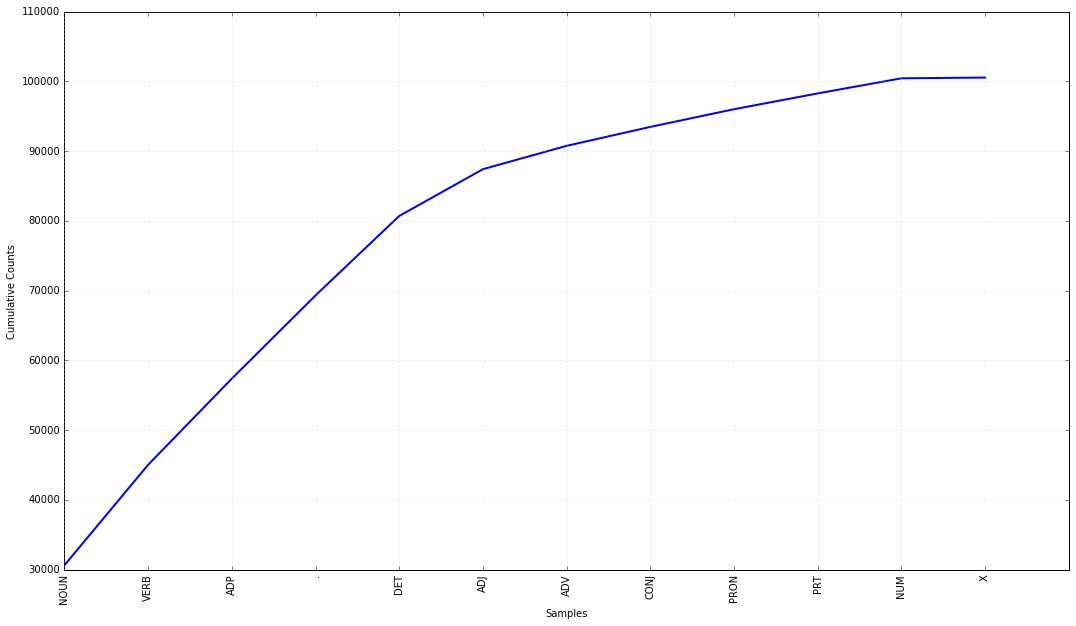

In [26]:
plot = plt.figure(figsize=(18,10))
tag_fd.plot(cumulative=True)

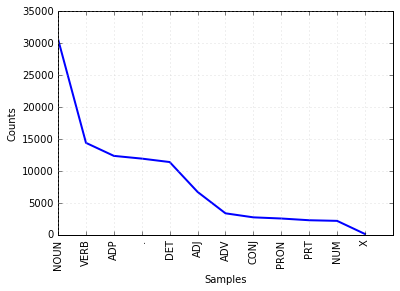

In [30]:
tag_fd.plot()

### Nouns

**what parts of speech appear before nouns?**

In [41]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
list(word_tag_pairs)[:20]

[(('The', 'DET'), ('Fulton', 'NOUN')),
 (('Fulton', 'NOUN'), ('County', 'NOUN')),
 (('County', 'NOUN'), ('Grand', 'ADJ')),
 (('Grand', 'ADJ'), ('Jury', 'NOUN')),
 (('Jury', 'NOUN'), ('said', 'VERB')),
 (('said', 'VERB'), ('Friday', 'NOUN')),
 (('Friday', 'NOUN'), ('an', 'DET')),
 (('an', 'DET'), ('investigation', 'NOUN')),
 (('investigation', 'NOUN'), ('of', 'ADP')),
 (('of', 'ADP'), ("Atlanta's", 'NOUN')),
 (("Atlanta's", 'NOUN'), ('recent', 'ADJ')),
 (('recent', 'ADJ'), ('primary', 'NOUN')),
 (('primary', 'NOUN'), ('election', 'NOUN')),
 (('election', 'NOUN'), ('produced', 'VERB')),
 (('produced', 'VERB'), ('``', '.')),
 (('``', '.'), ('no', 'DET')),
 (('no', 'DET'), ('evidence', 'NOUN')),
 (('evidence', 'NOUN'), ("''", '.')),
 (("''", '.'), ('that', 'ADP')),
 (('that', 'ADP'), ('any', 'DET'))]

In [42]:
word_tag_pairs = nltk.bigrams(brown_news_tagged) # generator needs to be redefined
noun_preceders = [a[1] for a, b in word_tag_pairs if b[1] == 'NOUN']
noun_preceders[:20]

['DET',
 'NOUN',
 'ADJ',
 'VERB',
 'DET',
 'ADP',
 'ADJ',
 'NOUN',
 'DET',
 'DET',
 'VERB',
 'DET',
 'ADP',
 'NOUN',
 'DET',
 'ADJ',
 'ADJ',
 'DET',
 'DET',
 'CONJ']

In [34]:
fdist = nltk.FreqDist(noun_preceders)
[tag for tag, _ in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

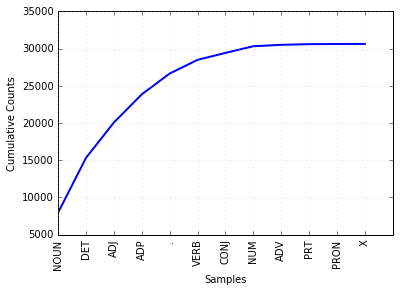

In [44]:
fdist.plot(cumulative=True)

### Verbs

**what are the most common verbs in news text?**

In [47]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')
word_tag_fd = nltk.FreqDist(wsj)
[wt[0] for wt, _ in word_tag_fd.most_common() if wt[1] == 'VERB'][:25]

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected']

*words and tags are paired. treat the **word as a condition** and the **tag as an event** and create a cfd*

**lists the most common tags, given a word**

In [59]:
cfd1 = nltk.ConditionalFreqDist(wsj)
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [60]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

---

reverse the order... conditions: tags, events: words 

**see the likely words, given a tag**

In [61]:
wsh = nltk.corpus.treebank.tagged_words()
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)
list(cfd2['ADJ'])[:25]

['protective',
 'insidious',
 'long',
 'crash',
 'daily',
 '238,000-circulation',
 'interior',
 'only',
 'near-record',
 'matching',
 'three-month',
 'Per-share',
 'questionable',
 'aggressive',
 'combined',
 'acute',
 '63-year-old',
 'seven-year',
 'mortgage-based',
 'impudent',
 'unproductive',
 'socialist',
 'tall',
 'sticky',
 'computer-aided']

### Adjectives and Adverbs

*skipping*

### Unsimplified Tags

*skipping*

### Exploring Tagged Corpora

**Find words that follow '*often*'**

In [66]:
brown_learned_text = brn.words(categories='learned')
sorted(set(b for a, b in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

**instead, use `tagged_words()` to look at POS tags**

In [68]:
brown_lrnd_tagged = brn.tagged_words(categories='learned', tagset='universal')
brown_lrnd_tagged

[('1', 'NUM'), ('.', '.'), ('Introduction', 'NOUN'), ...]

In [69]:
tags = [b[1] for a, b in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']
tags[:5]

['ADJ', 'ADV', 'VERB', 'VERB', 'ADJ']

In [70]:
fd = nltk.FreqDist(tags)
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


*POS that follow **'often'** the most are **verbs***

---

Find words that are parts of sequences of tags+words (e.g., **`Verb`, to, `Verb`**)

In [75]:
def process(sentence):
    for (w1, t1), (w2, t2), (w3, t3) in nltk.trigrams(sentence):
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')):
            print(w1, w2, w3)
            
for tagged_sent in brn.tagged_sents()[:200]:
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce


---
**Identifying words that have ambiguous POS tags**

In [76]:
brown_news_tagged = brn.tagged_words(categories='news', tagset='universal')
data = nltk.ConditionalFreqDist((word.lower(), tag)
                                for word, tag in brown_news_tagged)
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for tag, _ in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV NOUN VERB
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


## Mapping Words to Properties Using Python Dictionaries

*skipping this section on python dictionary usage*

## Automatic Tagging

**Using tagged *sentences* instead of words**

In [78]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
brown_sents[:1]

[['The',
  'Fulton',
  'County',
  'Grand',
  'Jury',
  'said',
  'Friday',
  'an',
  'investigation',
  'of',
  "Atlanta's",
  'recent',
  'primary',
  'election',
  'produced',
  '``',
  'no',
  'evidence',
  "''",
  'that',
  'any',
  'irregularities',
  'took',
  'place',
  '.']]

Example: create a default tagger that tags everything as **NN**

*default taggers assign a tag to every single word*

In [79]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'
tokens = word_tokenize(raw)
default_tagger = nltk.DefaultTagger('NN')
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

*this "tagger" performs poorly, of course*

In [80]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

**Default taggers are still useful because after processing several thousand words of English text, most new words will be nouns**

---

### The Regular Expression Tagger